<a href="https://colab.research.google.com/github/jaisatyaabhiram/Digit_classifier/blob/main/Digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


 Load and Preprocess Data

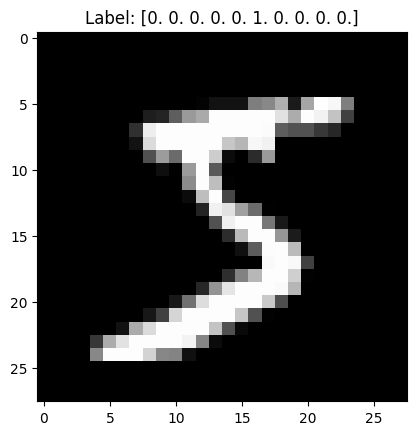

In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Optional: Show a sample image
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


Build the Model

In [3]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for digits 0–9
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile the Model

In [4]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


 Train the Model

In [5]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8775 - loss: 0.4206 - val_accuracy: 0.9642 - val_loss: 0.1190
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9688 - loss: 0.1012 - val_accuracy: 0.9715 - val_loss: 0.0888
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9781 - loss: 0.0719 - val_accuracy: 0.9730 - val_loss: 0.0873
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9830 - loss: 0.0525 - val_accuracy: 0.9779 - val_loss: 0.0729
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.9881 - loss: 0.0391 - val_accuracy: 0.9793 - val_loss: 0.0747


Evaluate the Model

In [6]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9768 - loss: 0.0870
Test accuracy: 97.93%


Make Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


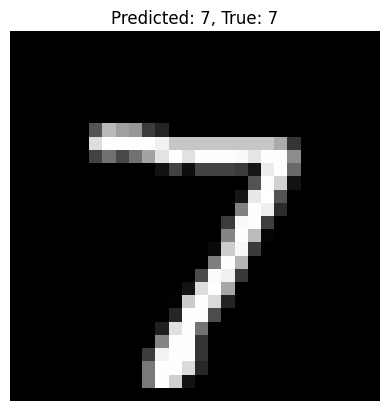

In [8]:
import matplotlib.pyplot as plt
import numpy as np

predictions = model.predict(x_test)
index = 0

# Get the predicted label
predicted_label = np.argmax(predictions[index])

# Get the true label
true_label = np.argmax(y_test[index])

# Plot the image
plt.imshow(x_test[index], cmap='gray')
plt.title(f"Predicted: {predicted_label}, True: {true_label}")
plt.axis('off')
plt.show()
